# EDA on STUDENT PERFORMANCE dataset
 

Data Collection Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("Data/StudentsPerformance.csv")

In [3]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Dataset Attributes : 
gender,
race/ethnicity,
parental level of education,
lunch,
test preparation course,
math score,
reading score &
writing score

In [8]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

Remarks: No duplicates and null values 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
numeric_features = [col for col in df.columns if df[col].dtype != 'O']
categorial_features = [col for col in df.columns if df[col].dtype == 'O']

In [20]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg score'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Added 2 new features : total score & avg score

<Axes: xlabel='avg score', ylabel='Count'>

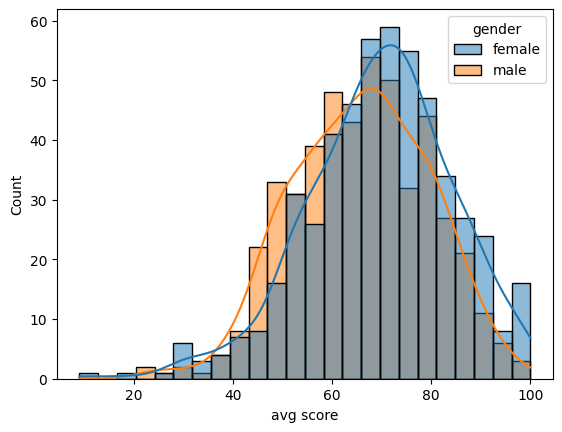

In [25]:
sns.histplot(x ='avg score',hue='gender',data=df,kde=True)

Text(0, 0.5, 'Writing Score')

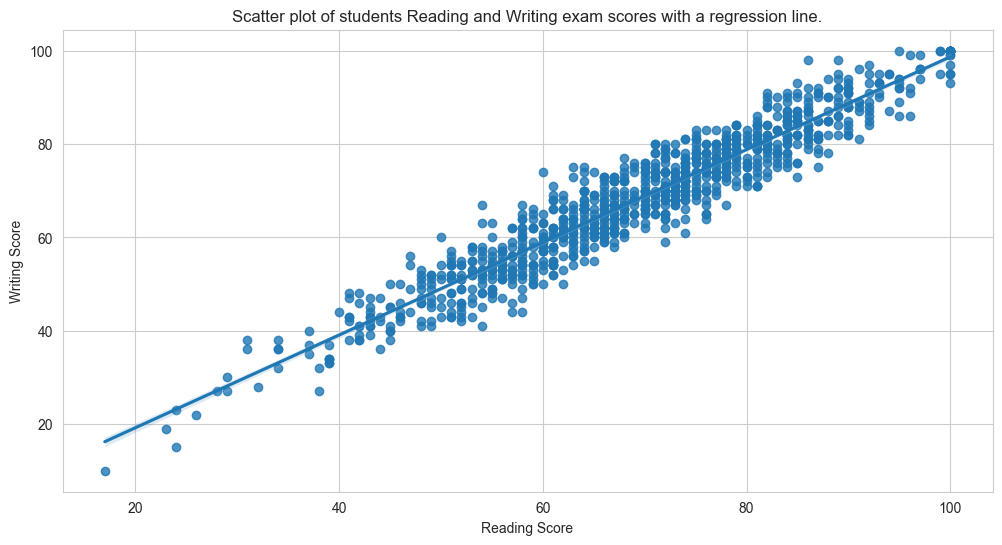

In [27]:
sns.set_style('whitegrid')

plt.figure(figsize=(12,6))
plt.title('Scatter plot of students Reading and Writing exam scores with a regression line.')
sns.regplot(x = df['reading score'], y =  df['writing score'])
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')

Text(111.47222222222221, 0.5, 'Math exam socre')

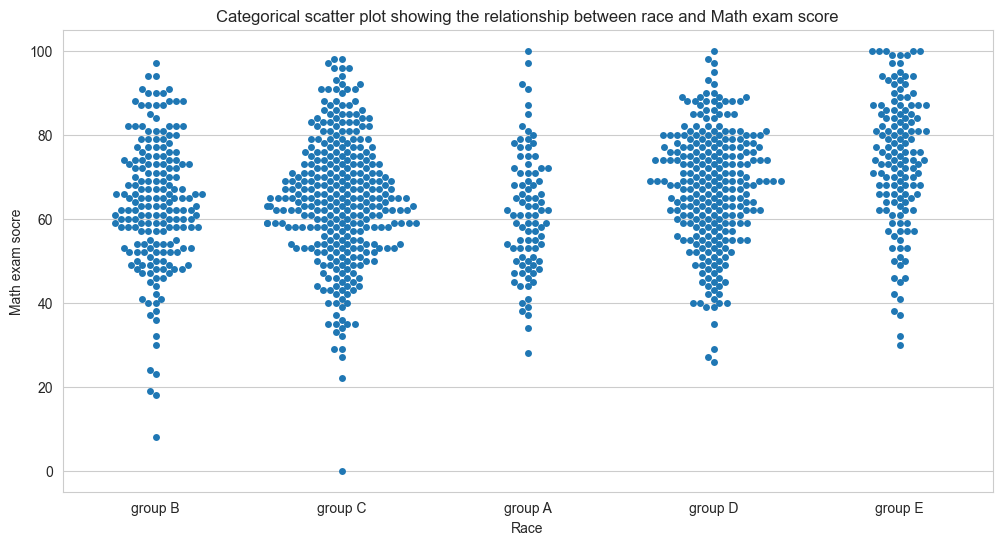

In [29]:
sns.set_style('whitegrid')

plt.figure(figsize=(12,6))
plt.title('Categorical scatter plot showing the relationship between race and Math exam score')
sns.swarmplot(x = df['race/ethnicity'], y = df['math score'])
plt.xlabel('Race')
plt.ylabel('Math exam socre')

Text(0, 0.5, 'Count')

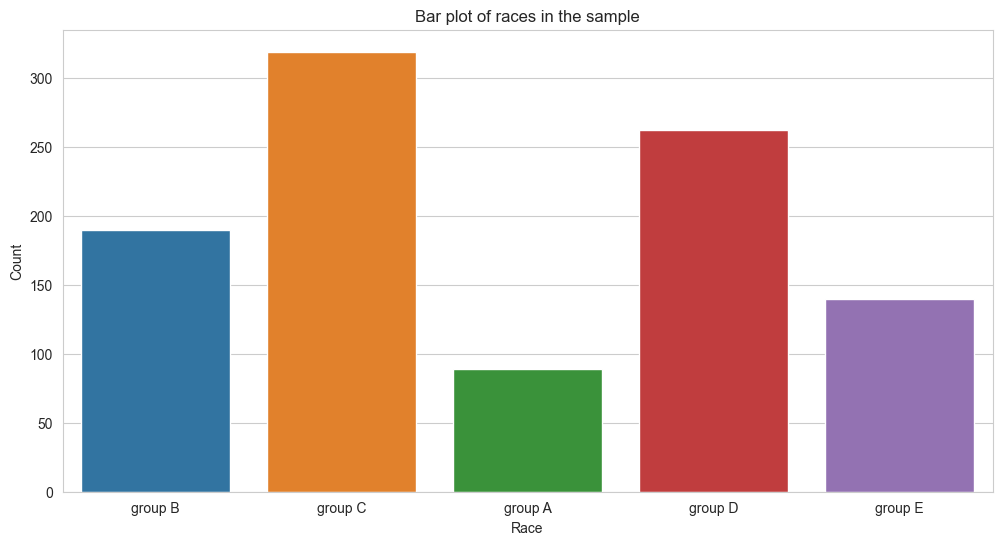

In [31]:

sns.set_style('whitegrid')

plt.figure(figsize=(12,6))
plt.title('Bar plot of races in the sample')
sns.countplot(x = df['race/ethnicity'],hue=df['race/ethnicity'])
plt.xlabel('Race')
plt.ylabel('Count')

In [35]:
import os
m = os.path.join('attributes','train_data.csv')
print(os.path.dirname(m))

attributes
